In [90]:
#Import Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset.shape

(569, 33)

## Check out the Missing Values

In [7]:
dataset.isnull().values.any()

True

In [8]:
dataset.isnull().values.sum()

569

In [9]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [10]:
dataset = dataset.drop(columns = 'Unnamed: 32')
dataset = dataset.drop(columns = 'id')

In [11]:
dataset.shape

(569, 31)

# Dealing with categorical data

In [12]:
X= dataset.iloc[ : , : -1].values
X

array([['M', 17.99, 10.38, ..., 0.7119, 0.2654, 0.4601],
       ['M', 20.57, 17.77, ..., 0.2416, 0.186, 0.275],
       ['M', 19.69, 21.25, ..., 0.4504, 0.243, 0.3613],
       ...,
       ['M', 16.6, 28.08, ..., 0.3403, 0.1418, 0.2218],
       ['M', 20.6, 29.33, ..., 0.9387, 0.265, 0.4087],
       ['B', 7.76, 24.54, ..., 0.0, 0.0, 0.2871]], dtype=object)

In [13]:
dataset.select_dtypes(include = 'object').columns

Index(['diagnosis'], dtype='object')

In [14]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
dataset['diagnosis'].nunique()

2

In [16]:
# One hot encoding
dataset = pd.get_dummies(data = dataset, drop_first=True)
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Countplot

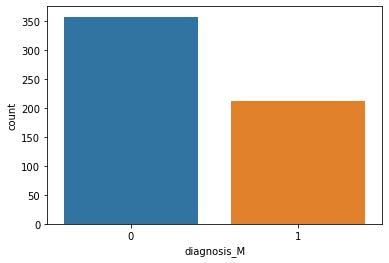

In [17]:
sns.countplot(dataset['diagnosis_M'], label='Count')
plt.show()

In [18]:
# B(0) values
(dataset.diagnosis_M == 0).sum()

357

In [19]:
# M(1) values
(dataset.diagnosis_M == 1).sum()

212

## Splitting the dataset into Training and Test Set

In [20]:
X= dataset.iloc[ : , : -1].values
y= dataset['diagnosis_M'].values

In [21]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)

In [24]:
X_test.shape

(114, 30)

In [25]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

# Logistic Regression

In [26]:
from logistic_regression import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [28]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=10000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9210526315789473


In [95]:
def plot_conf_mx(cm, classifier_name, ax):
    sns.heatmap(cm, annot = True, cmap = 'Blues', annot_kws = {'fontsize': 24}, ax = ax)
    ax.set_title('{}'.format(classifier_name))
    ax.set_xlabel('Predicted diagnosis')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['0', '1'])
    ax.set_ylabel('True Label') 
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['0', '1']);
    
def clf_performance(classifier, classifier_name, classifier_name_abv):
    print('\n', classifier_name)
    print('-------------------------------')
    print('   Best Score ({}): '.format(scoring_metric) + str(np.round(classifier.best_score_, 3)))
    print('   Best Parameters: ')
    for key, value in classifier.best_params_.items() :
        print ('      {}: {}'.format(key, value))
    
    y_pred_pp = cross_val_predict(classifier.best_estimator_, X_train, y_train, cv = 5, method = 'predict_proba')[:, 1]
    y_pred = y_pred_pp.round()
    
    cm = confusion_matrix(y_train, y_pred, normalize = 'true')
    
    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    
    comparison_dict[classifier_name_abv] = [accuracy_score(y_train, y_pred), 
                                            precision_score(y_train, y_pred),
                                            recall_score(y_train, y_pred),
                                            roc_auc_score(y_train, y_pred_pp),
                                            fpr, tpr]    

    fig, ax = plt.subplots(figsize = (5, 4))
    
    plot_conf_mx(cm, '', ax)    
    plt.tight_layout();
   


 Logistic Regression
-------------------------------
   Best Score (recall): 0.936
   Best Parameters: 
      C: 10
      max_iter: 100
      penalty: l1
      solver: liblinear


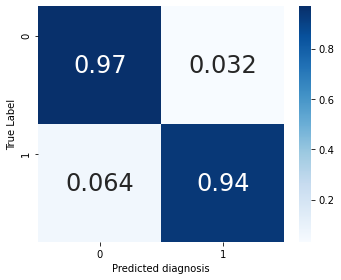

In [96]:
scoring_metric = 'recall'
comparison_dict = {}


lr = LogisticRegression(random_state = 42)

param_grid = {'max_iter' : [100],
              'penalty' : ['l1', 'l2'],
              'C' : [0.001, 0.01, 0.1, 1, 10],
              'solver' : ['lbfgs', 'liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, scoring = 'recall', 
                      cv = 5, verbose = False, n_jobs = -1)

best_clf_lr = clf_lr.fit(X_train, y_train)
clf_performance(best_clf_lr, 'Logistic Regression', 'LR')

In [29]:
# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.956140350877193
Precision: 0.9487179487179487
Recall: 0.925


# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
ran=RandomForestClassifier(n_estimators=100,min_samples_split=2)
ran.fit(X_train, y_train)
predictions=ran.predict(X_test)

In [49]:
predictions

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0], dtype=uint8)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9912280701754386
Precision: 0.975609756097561
Recall: 1.0


# Hyperparameter Tuning using Randomized search

In [80]:
import random

param = { 'max_depth':[6,9, None], 
          'n_estimators':[50, 70, 100], 
          'max_features':[random.randint(1,6)],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf': [1, 2, 4]}

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [84]:
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =100, cv=9)
rnd_search.fit(X,y)
rnd_search.best_params_
rnd_search.best_score_

0.9702380952380953